In [20]:
####Part a: Run the process given Paramenters
#Calculating P(N(t)=X), given t,X,lambda=k... Poisson Process
import math
def poisson_process(t,k,X):#Function for Poisson Process Probabilities
    a=math.exp(-k*t)*(k*t)**X/math.factorial(X)
    print(a)

poisson_process(2,2,5) #Input Example

0.15629345185053165


Choice of lambda: 5
Time t: 5
Max of X for plot: 100
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[3.471985966241005e-10, 4.339982457801257e-09, 3.616652048167714e-08, 2.260407530104821e-07, 1.1302037650524104e-06, 4.709182354385044e-06, 1.6818508408518014e-05, 5.25578387766188e-05, 0.00014599399660171887, 0.0003649849915042972, 0.0008295113443279481, 0.0017281486340165588, 0.0033233627577241515, 0.005934576353078842, 0.009890960588464736, 0.015454625919476151, 0.022727391058053163, 0.031565820913962726, 0.04153397488679306, 0.05191746860849132, 0.06180651024820396, 0.07023467073659541, 0.07634203340934283, 0.07952295146806546, 0.07952295146806

Text(0.5, 1.0, 'P(N(t)=X) for a selected t')

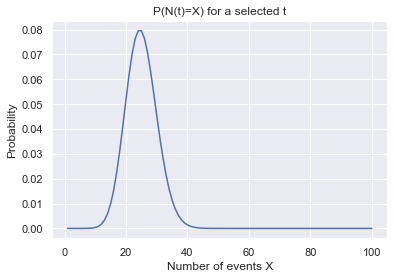

In [2]:
#Plotting the curve for N(t), for a given t
import math
import matplotlib.pyplot as plt
import seaborn as sns #For plotting
sns.set()
k= int(input("Choice of lambda: ")) #User Input - the desired parameters
t= int(input("Time t: "))
X=int(input("Max of X for plot: "))
list_X=[]
list_P=[]
for i in range(1,X+1):
    p=math.exp(-k*t)*(k*t)**i/math.factorial(i)
    list_X.append(i) #Appending the X values
    list_P.append(p) #Appending the probabilities
print(list_X)
print(list_P)
#plotting the data
plt.plot(list_X, list_P)  #Plotting the probabilities
plt.xlabel('Number of events X')
plt.ylabel('Probability')
plt.title('P(N(t)=X) for a selected t') 
#Ex. use lambda=5, t=5, max X =100 as user input

In [17]:
####Part b: Given Number of events in the given time, find out the expected time
t_given=int(input("Total time duration t: ")) #User Input 
N_t=int(input("Total Events taken place during time duration N_t: "))
N_t_1=int(input("ith Event who's expected time is required ti: "))
math.ceil(N_t_1/(N_t+1)*t_given) 
#Example, use t=100, N_t=3 and ti=2. This will give the E(time in which event 2 will occur)


Total time duration: 100
Total Events taken place during time duration t: 3
ith Event who's expected time is required: 2


50

In [7]:
####Part c: Simulate Thinning Process
'''Assume 10 Vehicles pass the junction in 1 minute with Poisson distribution.
30% of them are cars and 70% are bikes.Between 8th and 10th minute ( i.e. 2 min window),
QUESTION: If there are 18 vehicles, what is the probability that 10 of them are bikes ?
(Here, lambda=10, lambda1=3, lambda2=7)
'''
#Code for decomposing a poisson process into 2 poisson process.
#(Similar can also be done for multiple decomposed Poisson processes)
import math
def poisson_process(t,k,X):
    a=math.exp(-k*t)*(k*t)**X/math.factorial(X)
    print(a)
lambda1= int(input("Initial lambda: ")) #User Input
lambda1_a= int(input("lambda for 1st Poisson Process: "))
lambda1_b=lambda1-lambda1_a
t1=int(input("Time window: "))
X1=int(input("Number of events for 1st Poisson Process: "))
X2=int(input("Number of events for 2nd Poisson Process: ")) #Substituting all values in the formula
(math.exp(-lambda1_a*t1)*(lambda1_a*t1)**X1/math.factorial(X1))\
*(math.exp(-lambda1_b*t1)*(lambda1_b*t1)**X2/math.factorial(X2))\
/(math.exp(-lambda1*t1)*(lambda1*t1)**(X1+X2)/math.factorial(X1+X2))



Initial lambda: 10
lambda for 1st Poisson Process: 3
Time window: 2
Number of events for 1st Poisson Process: 8
Number of events for 2nd Poisson Process: 10


0.08109758131601326

In [65]:
####Part d: Simulate Super Position of the process
#Super Position Process
import math
import random
import numpy as np
import scipy.integrate as integrate



def poisson_PMF(x,lambda_):
    PMF= math.exp(-lambda_)*math.pow(lambda_,x)/math.factorial(x)
    return(PMF)

lamb_1=3
lamb_2=4
lamb_3=lamb_1 + lamb_2
counter=0

rand_list=[random.randrange(1,170,1) for j in range(10000)]

for i in rand_list:
    if((poisson_PMF(i,lamb_1)+poisson_PMF(i,lamb_2))-poisson_PMF(i,lamb_3)<0.01):
        counter=counter+1

print(counter/len(rand_list))

0.9711


In [4]:
####Part e: Simulate Compound Process

'''Compound Poisson Process- Lets assume that number of people coming to the restaurant is a Poisson
Distribution with 10 customers per hour and their bill amounts are uniformly distributed with a range of 
1000 to 6000. Simulate to find out the expected amount of sales in a day and variance of the amount of sales
in a day'''
import numpy as np
t=24            #number of hours in a day
list_mean=[]    #list for appending values for lambda*t*E(Y)
list_var=[]     #list for appending values for lambda*t*E(Y^2)

for i in range(10000):
    customers= np.random.poisson(10,24)     #generating 24 hours customer arrivals
    bill_amount=np.random.uniform(1000,6000,sum(customers))     #bill amounts for each customer
    list_mean.append(np.mean(customers)*t*np.mean(bill_amount))     #calculating compound Poisson process mean
    list_var.append(np.mean(customers)*t*np.mean([num*2 for num in bill_amount]))  #calculating compound poisson process variance

print(customers)  #printing number of customers in an hour
print((np.mean(list_mean)-t*10*np.mean([1000,6000]))/np.mean(list_mean))   #error value compared to the calculated
print((np.mean(list_var)-t*10*np.mean([num**2 for num in range(1000,6001)]))/np.mean(list_var))     #error value value compared to the calculated

print(np.mean(list_mean),"  ",t*10*np.mean([1000,6000]))      #values theoretical Vs simulation
print(np.mean(list_var),"  ",t*10*np.mean([num**2 for num in range(1000,6001)]))        #values theoretical Vs simulation

[ 9  7  9  4 13 16  7  9 12  5  3  8  5  9 10  6  9  9 13  6 11 10 10  7]
-0.0003524899011508456
-2047.4599022368686
839704.0128155267    840000.0
1679408.0256310534    3440200000.0


In [6]:
####Part f: Simulate the non-homogenous Poisson Process
#Non-homogeneous Poisson Process
'''Rate of a Poisson Process is said to vary with respect to time as t^2 *lambda/t+2 where 0<t<24. Simulate this non-homogeneous 
 Poisson Process'''

'''lambda_1=3 #rate in a homogenous Poisson process
res_1=integrate.quad(lambda t: (t)**2 * (lambda_1/(t+20)),0,24)
print(list(res_1)) #Average number of customers in a day when customers'''
import math
import random
import numpy as np
import scipy.integrate as integrate

lambda_1=3   #declaring assumed lambda
lis_1=[]     #values for a particular time
lis_2=[]      #mean of a values of a particular time
import random
for j in range(10,24):
    for i in range(10000):
        x=random.randint(0,j)
        y=random.randint(0,j)
        res_1=list(integrate.quad(lambda t: (t)*3 * (lambda_1/(t*2+20)),x,y))       #integrate the non-homogenous poisson function
        if y-x<0:
            continue
        try:
            lis_1.append(res_1[0]/y-x)      #storing the integral value divided by time range
        except:
            continue
    try:
        lis_2.append(np.mean(lis_1))        #storing the mean of integral values divided by time range
    except:
        continue
    lis_1=[]        #making the list empty

print(lis_2)        #printing mean of values for time 
print(np.mean(lis_2))       #printing overall mean

[-2.7906639925464845, -3.026186558311626, -3.3400779137567174, -3.7149545946456968, -3.8913485440424243, -4.200699402405439, -4.539789496738408, -4.8087310309140445, -5.162628630024328, -5.441713536371869, -5.586141723480678, -5.860300227532096, -6.153935526659078, -6.715290605730051]
-4.659461555939925
